# Plots for papers

This is currently a place-holder but we will use this notebook to generate plots for the papers.



In [3]:
# Numpy
import numpy as np
# Plotting stuff and suppressing boring warnings
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings('ignore')

# Get the GQP code
import sys
# Set the path where the py scripts are
sys.path.append("../py/")
import set_agn_masksDESI
from set_agn_masksDESI import get_agn_maskbits

import fitsio

# Import Astropy libraries - useful for many astronomy related function
from astropy.table import Table #, join, Column
from astropy.io import fits

# TO DO: simplify/clean this?
settings = {
    'font.size':14,
    'axes.linewidth':2.0,
    'xtick.major.size':6.0,
    'xtick.minor.size':4.0,
    'xtick.major.width':2.0,
    'xtick.minor.width':1.,
    'xtick.direction':'in', 
    'xtick.minor.visible':True,
    'xtick.top':True,
    'ytick.major.size':6.0,
    'ytick.minor.size':4.0,
    'ytick.major.width':2.0,
    'ytick.minor.width':1.,
    'ytick.direction':'in', 
    'ytick.minor.visible':True,
    'ytick.right':True,
    'axes.labelsize':18
    }

plt.rcParams.update(**settings)

## Read data

In [4]:
def return_catdir(location='nersc'):

    dl_path = '~/data/DESI/science/gqp/agncatalog/catalog/'
    nersc_path = '/global/cfs/cdirs/desi/science/gqp/agncatalog/dr1/v1.0/'
    if location=='datalab':
        return(dl_path)
    else:
        return(nersc_path)  #default

In [5]:
catdir = return_catdir(location='nersc')

# Open the catalog
agn_hdul = fits.open(f'{catdir}agnqso_desi.fits', format='fits')
agn_hdul.info()

Filename: /global/cfs/cdirs/desi/science/gqp/agncatalog/dr1/v1.0/agnqso_desi.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  AGNCAT        1 BinTableHDU     89   17995599R x 36C   [K, 7A, 6A, J, D, D, K, 6A, K, K, K, J, D, D, K, D, D, D, I, E, L, L, L, K, K, K, K, K, K, K, K, K, K, K, K, K]   
  2  AUXDATA       1 BinTableHDU    182   17995599R x 58C   [K, 7A, 6A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   


In [6]:
%%time
# Load the catalog into Astropy tables
T = Table(agn_hdul[1].data)
T2 = Table(agn_hdul[2].data)

CPU times: user 46.3 s, sys: 12.3 s, total: 58.6 s
Wall time: 59.5 s


In [7]:
AGN_MASKBITS, OPT_UV_TYPE, IR_TYPE = get_agn_maskbits('../py/agnmask.yaml')

## Plot z distributions

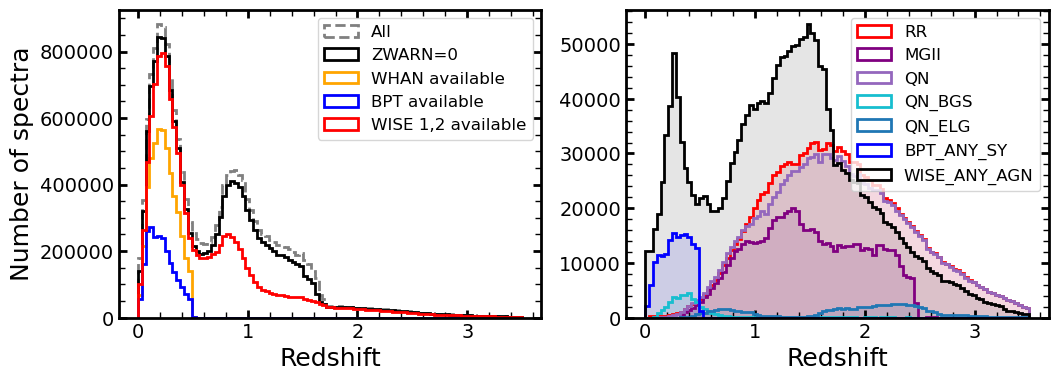

In [11]:
#agntypes = ['RR', 'MGII', 'QN', 'QN_BGS', 'QN_ELG', 'BPT_ANY_SY', 'OPT_OTHER_AGN', 'WISE_ANY_AGN']
#colors = ['red', 'purple', 'tab:purple', 'tab:cyan', 'tab:blue', 'blue', 'green', 'black']

# TO DO: add QSO in labels; 

agntypes = ['RR', 'MGII', 'QN', 'QN_BGS', 'QN_ELG', 'BPT_ANY_SY', 'WISE_ANY_AGN']
colors = ['red', 'purple', 'tab:purple', 'tab:cyan', 'tab:blue', 'blue', 'black']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4), sharex=True)

rz = (0,3.5)

# Left-hand panel: full catalog + only secure redshifts
ax1.hist(T['Z'],bins=100,range=(rz), histtype='step', lw=2, color='gray', ls='--', label='All')
ax1.hist(T['Z'][T['ZWARN']==0],bins=100,range=(rz), histtype='step', lw=2, color='k', label='ZWARN=0')

# WHAN available
ax1.hist(T['Z'][(T['ZWARN']==0)&(T['OPT_UV_TYPE'] & OPT_UV_TYPE.WHAN != 0)],bins=100,range=(rz), 
         histtype='step', lw=2, color='orange', label='WHAN available')

# BPT available
ax1.hist(T['Z'][(T['ZWARN']==0)&(T['OPT_UV_TYPE'] & OPT_UV_TYPE.NII_BPT != 0)],bins=100,range=(rz), 
         histtype='step', lw=2, color='b', label='BPT available')

# WISE (W1, W2) available [some diagrams need W1, W2, W3]
ax1.hist(T['Z'][(T['ZWARN']==0)&(T['IR_TYPE'] & IR_TYPE.WISE_W12 != 0)],bins=100,range=(rz), 
         histtype='step', lw=2, color='r', label='WISE 1,2 available')

# Right-hand panel: selected classes of AGN/QSO
for i, agn in enumerate(agntypes):
    sel = (T['AGN_MASKBITS'] & AGN_MASKBITS[agn] != 0)
    col = colors[i]
    ax2.hist(T['Z'][sel],bins=100,range=(rz), alpha=0.1, color=col)
    ax2.hist(T['Z'][sel],bins=100,range=(rz), label=agn, histtype='step', lw=2, color=col)

# Axis labels
ax1.set_xlabel('Redshift')
ax1.set_ylabel('Number of spectra')
ax2.set_xlabel('Redshift')

# Legends
ax1.legend(fontsize=12)
ax2.legend(fontsize=12)
plt.show()

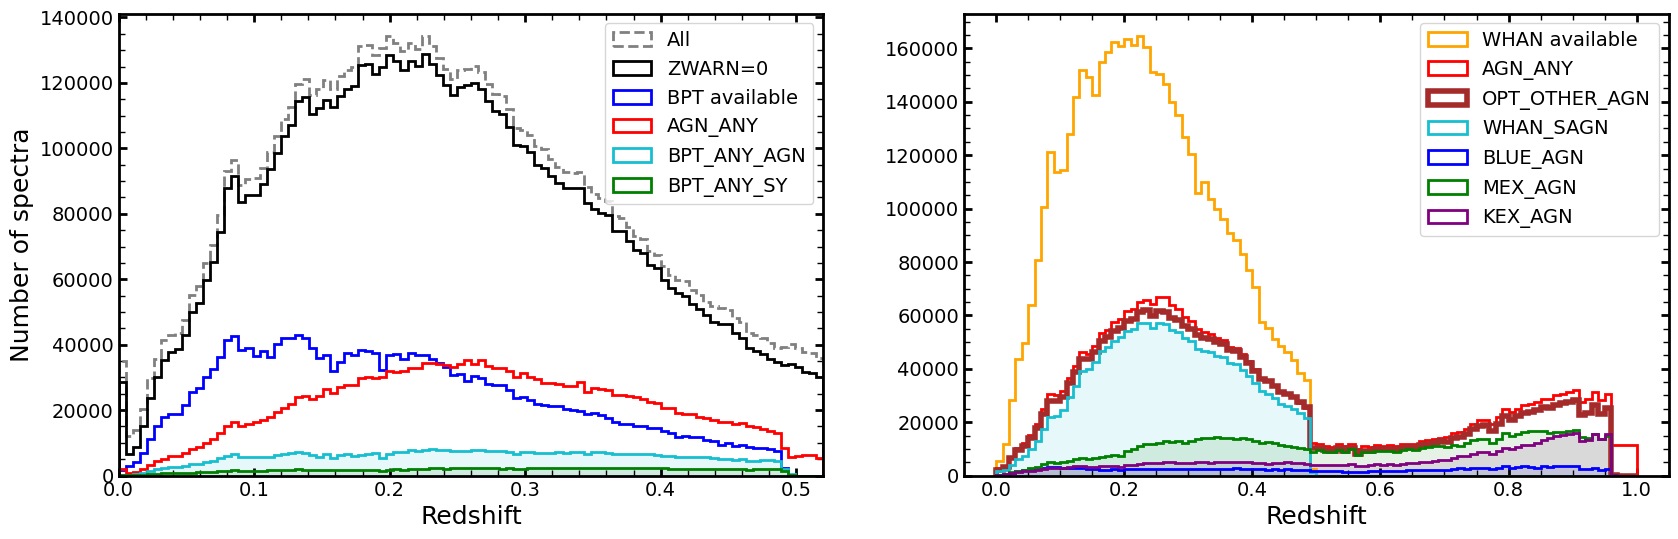

In [12]:
## To Do: add a second panel to showcase some "OTHER_OPT_UV" diagnostics so extending to z~1 or z~1.5 as appropriate

agnany = (T['AGN_MASKBITS'] & AGN_MASKBITS['AGN_ANY'] !=0)

## Focusin on low-z, BPT
agntypes = ['BPT_ANY_AGN', 'BPT_ANY_SY']
colors = ['tab:cyan', 'green']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6), sharex=False)

zr1 = (0,0.52)

# Left-hand panel: full catalog + only secure redshifts
ax1.hist(T['Z'],bins=100,range=zr1, histtype='step', lw=2, color='gray', ls='--', label='All')
ax1.hist(T['Z'][T['ZWARN']==0],bins=100,range=zr1, histtype='step', lw=2, color='k', label='ZWARN=0')

# Available
ax1.hist(T['Z'][(T['ZWARN']==0)&(T['OPT_UV_TYPE'] & OPT_UV_TYPE.NII_BPT != 0)],bins=100,range=zr1, histtype='step', lw=2, color='b', label='BPT available')

## AGN ANY
ax1.hist(T['Z'][agnany&(T['ZWARN']==0)],bins=100,range=zr1, histtype='step', lw=2, color='red', label='AGN_ANY')

#selected classes of AGN/QSO
for i, agn in enumerate(agntypes):
    sel = (T['AGN_MASKBITS'] & AGN_MASKBITS[agn] != 0)
    col = colors[i]
    ax1.hist(T['Z'][sel],bins=100,range=zr1, alpha=0.1, color=col)
    ax1.hist(T['Z'][sel],bins=100,range=zr1, label=agn, histtype='step', lw=2, color=col)

ax1.set_xlim(zr1)

## Right-hand panel
zr2 = (0,1.)
optuv_types = ['WHAN_SAGN', 'BLUE_AGN', 'MEX_AGN', 'KEX_AGN']
colors = ['tab:cyan', 'blue', 'green', 'purple']

# full catalog + only secure redshifts
#ax2.hist(T['Z'],bins=100,range=zr2, histtype='step', lw=2, color='gray', ls='--', label='All')
#ax2.hist(T['Z'][T['ZWARN']==0],bins=100,range=zr2, histtype='step', lw=2, color='k', label='ZWARN=0')

# Available
ax2.hist(T['Z'][(T['ZWARN']==0)&(T['OPT_UV_TYPE'] & OPT_UV_TYPE.WHAN != 0)],bins=100,range=zr2, histtype='step', lw=2, color='orange', label='WHAN available')

## AGN ANY
ax2.hist(T['Z'][agnany&(T['ZWARN']==0)],bins=100,range=zr2, histtype='step', lw=2, color='red', label='AGN_ANY')

## OPT_OTHER_AGN (seems to have a bug as it only picked up WHAN and not MEx, Blue, KEx)
## Also KEx is missing entirely??
sel = (T['AGN_MASKBITS'] & AGN_MASKBITS['OPT_OTHER_AGN'] != 0)
ax2.hist(T['Z'][sel],bins=100,range=zr2, histtype='step', lw=4, color='brown', label='OPT_OTHER_AGN')
#&(T['ZWARN']==0)

#selected classes of AGN/QSO
for i, agn in enumerate(optuv_types):
    sel = (T['OPT_UV_TYPE'] & OPT_UV_TYPE[agn] != 0)
    col = colors[i]
    ax2.hist(T['Z'][sel],bins=100,range=zr2, alpha=0.1, color=col)
    ax2.hist(T['Z'][sel],bins=100,range=zr2, label=agn, histtype='step', lw=2, color=col)

# Legends
ax1.legend()
ax2.legend()

# Axis labels
ax1.set_xlabel('Redshift')
ax1.set_ylabel('Number of spectra')
ax2.set_xlabel('Redshift')

plt.show()